In [170]:
# in this project we perform customer segmentation on a sales dataset. the available features are: order_number, order_date, customer_number, type, month, item_number (SKU), quantity, category, revenue, customer_source, order_source

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [172]:
df= pd.read_csv('data/sales.csv')

# Display the first few rows of the DataFrame
print(df.head())

  order_number  order_date customer_number       type    month item_number  \
0       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE0895   
1       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE1000   
2       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE0921   
3       KE0002  2024-01-01         CKE0580  WHOLESALE  2024-01      KE0015   
4       KE0002  2024-01-01         CKE0580  WHOLESALE  2024-01      KE0224   

   quantity       category    revenue customer_source order_source  
0        12       DIABETES   5.098618          direct          App  
1        23  HYPERTENSIVES  12.460205          direct          App  
2        12  HYPERTENSIVES   8.012194          direct          App  
3        23       DIABETES  13.854194           agent         call  
4        21  HYPERTENSIVES  10.534678           agent         call  


In [173]:
# check for missing values
print(df.isnull().sum())

order_number       0
order_date         0
customer_number    0
type               0
month              0
item_number        0
quantity           0
category           0
revenue            0
customer_source    0
order_source       0
dtype: int64


In [174]:
# check the data types of the columns
print(df.dtypes)

order_number        object
order_date          object
customer_number     object
type                object
month               object
item_number         object
quantity             int64
category            object
revenue            float64
customer_source     object
order_source        object
dtype: object


In [175]:
# convert the order_date and month columns to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = pd.to_datetime(df['month'])
df.dtypes

order_number               object
order_date         datetime64[ns]
customer_number            object
type                       object
month              datetime64[ns]
item_number                object
quantity                    int64
category                   object
revenue                   float64
customer_source            object
order_source               object
dtype: object

In [176]:
# unique values in each column
print(df.nunique())

order_number       20600
order_date           206
customer_number     1000
type                   2
month                  7
item_number         1000
quantity              36
category               2
revenue            61800
customer_source        2
order_source           5
dtype: int64


/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/484160246.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_abbr', y='revenue', data=monthly_revenue, palette='viridis')


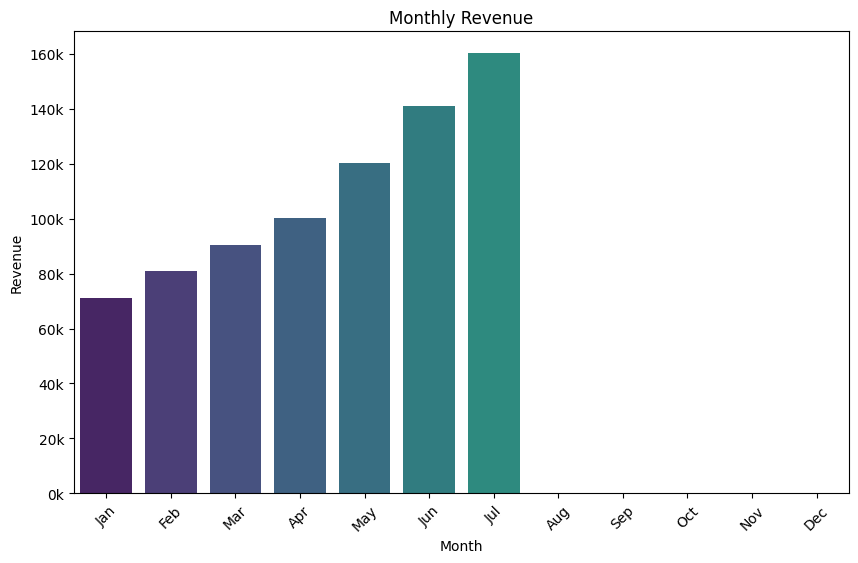

In [177]:

df['month'] = df['order_date'].dt.month
month_abbr = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['month_abbr'] = df['month'].map(month_abbr)

# Aggregate monthly revenue
monthly_revenue = df.groupby('month_abbr')['revenue'].sum().reset_index()

# Define a categorical type for the month_abbr to ensure proper sorting
monthly_revenue['month_abbr'] = pd.Categorical(monthly_revenue['month_abbr'], 
                                               categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                               ordered=True)

# Sort by the 'month_abbr' column
monthly_revenue = monthly_revenue.sort_values(by='month_abbr')

# Plot monthly revenue
plt.figure(figsize=(10, 6))
sns.barplot(x='month_abbr', y='revenue', data=monthly_revenue, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

# Format y-label as shortened form
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plt.xticks(rotation=45)
plt.show()

In [178]:
df.dtypes

order_number               object
order_date         datetime64[ns]
customer_number            object
type                       object
month                       int32
item_number                object
quantity                    int64
category                   object
revenue                   float64
customer_source            object
order_source               object
month_abbr                 object
dtype: object

In [179]:
# Top 10 performing products by revenue
top_10_products = df.groupby('item_number')['revenue'].sum().nlargest(10).reset_index()

# Average revenue by category
avg_revenue_category = df.groupby('category')['revenue'].mean().reset_index()

# Average revenue by type
avg_revenue_type = df.groupby('type')['revenue'].mean().reset_index()

# Average revenue by customer source
avg_revenue_customer_source = df.groupby('customer_source')['revenue'].mean().reset_index()

# Average revenue by order source
avg_revenue_order_source = df.groupby('order_source')['revenue'].mean().reset_index()

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/829695495.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item_number', y='revenue', data=top_10_products, palette='viridis')


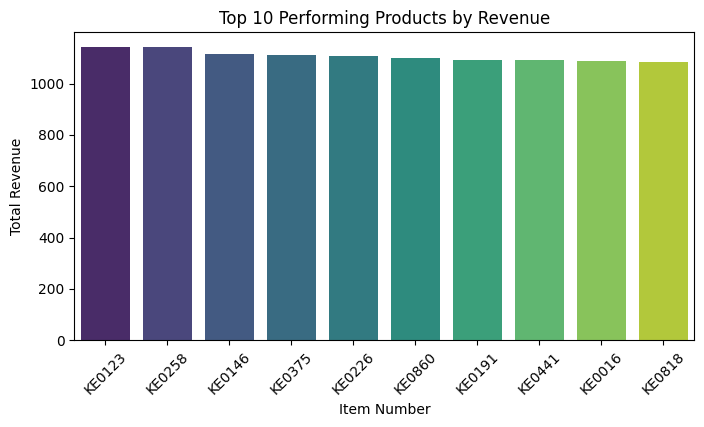

In [180]:
# Visualizing the metrics

# Bar chart for Top 10 performing products
plt.figure(figsize=(8, 4))
sns.barplot(x='item_number', y='revenue', data=top_10_products, palette='viridis')
plt.title('Top 10 Performing Products by Revenue')
plt.xlabel('Item Number')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

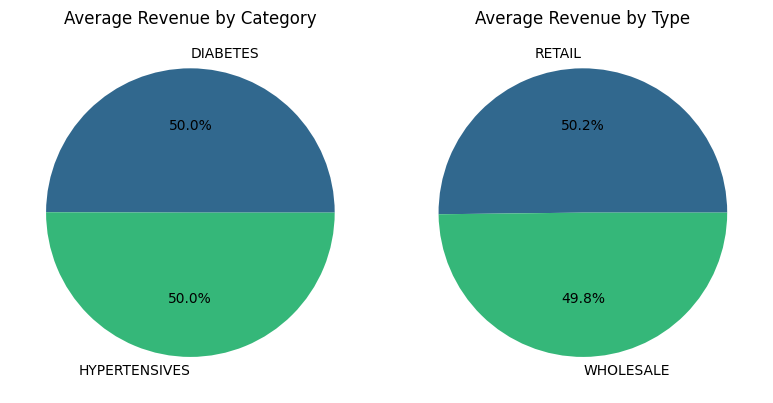

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Average Revenue by Category
axes[0].pie(avg_revenue_category['revenue'], labels=avg_revenue_category['category'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[0].set_title('Average Revenue by Category')

# Pie chart for Average Revenue by Type
axes[1].pie(avg_revenue_type['revenue'], labels=avg_revenue_type['type'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[1].set_title('Average Revenue by Type')

plt.tight_layout()
plt.show()


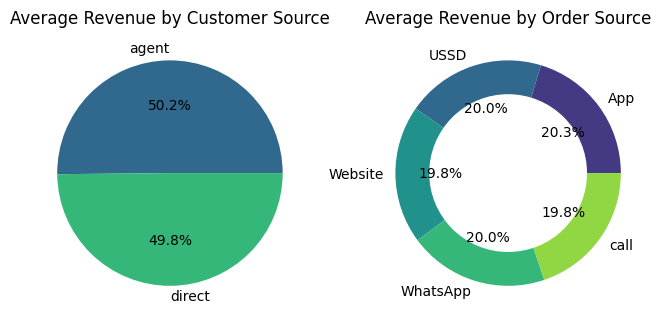

In [182]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Average Revenue by Customer Source
axes[0].pie(avg_revenue_customer_source['revenue'], labels=avg_revenue_customer_source['customer_source'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[0].set_title('Average Revenue by Customer Source')

# Donut chart for Average Revenue by Order Source
axes[1].pie(avg_revenue_order_source['revenue'], labels=avg_revenue_order_source['order_source'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 5))
axes[1].set_title('Average Revenue by Order Source')
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


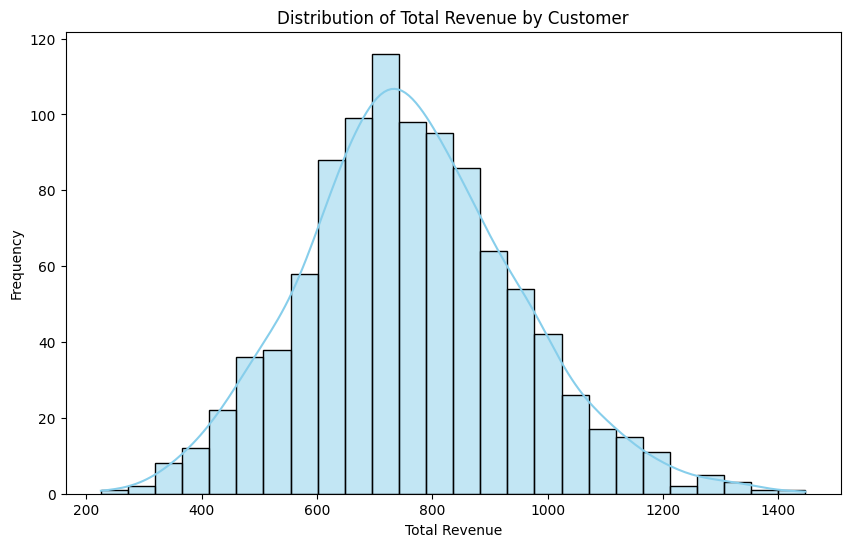

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/3970553464.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='customer_number', data=top_n_customers, palette='viridis')


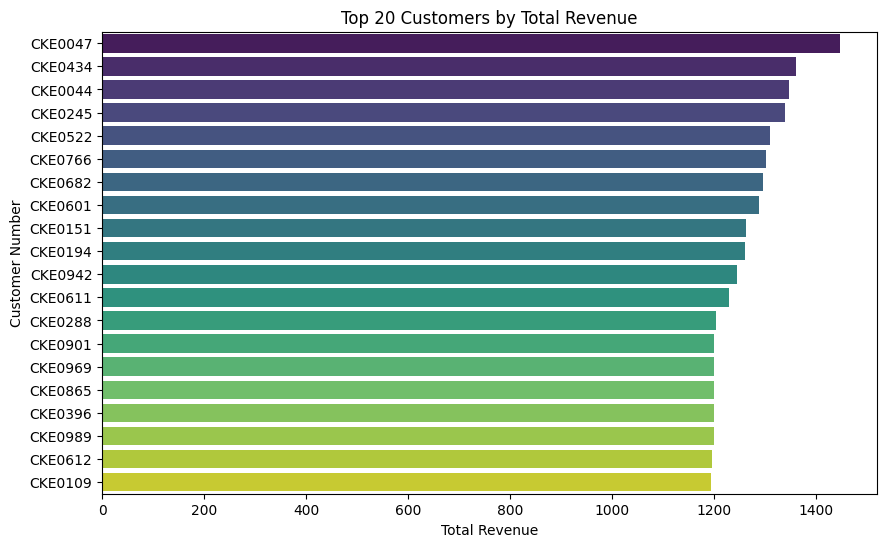

In [183]:
# Calculate total revenue for each customer
total_revenue = df.groupby('customer_number')['revenue'].sum().reset_index()
total_revenue.columns = ['customer_number', 'total_revenue']

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(total_revenue['total_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Customer')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

# Top N Bar Chart (Top 20 Customers)
top_n_customers = total_revenue.nlargest(20, 'total_revenue')
plt.figure(figsize=(10, 6))
sns.barplot(x='total_revenue', y='customer_number', data=top_n_customers, palette='viridis')
plt.title('Top 20 Customers by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Number')
plt.show()

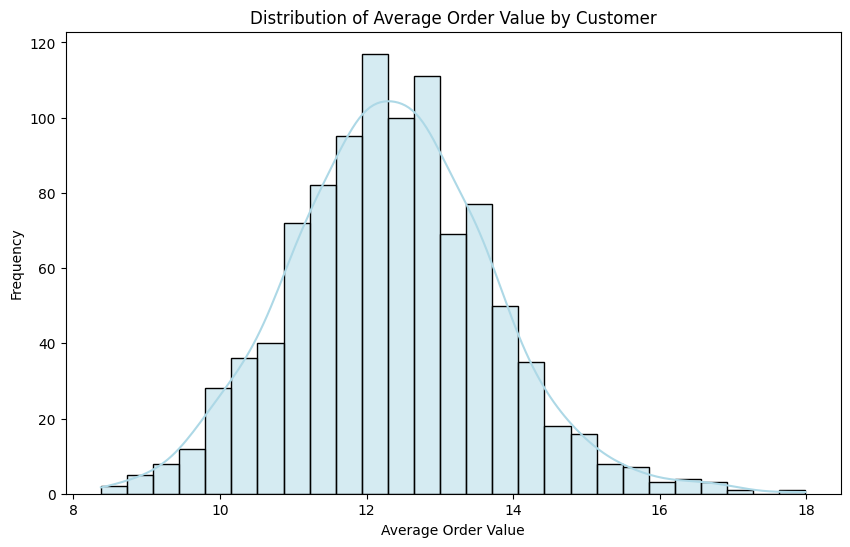

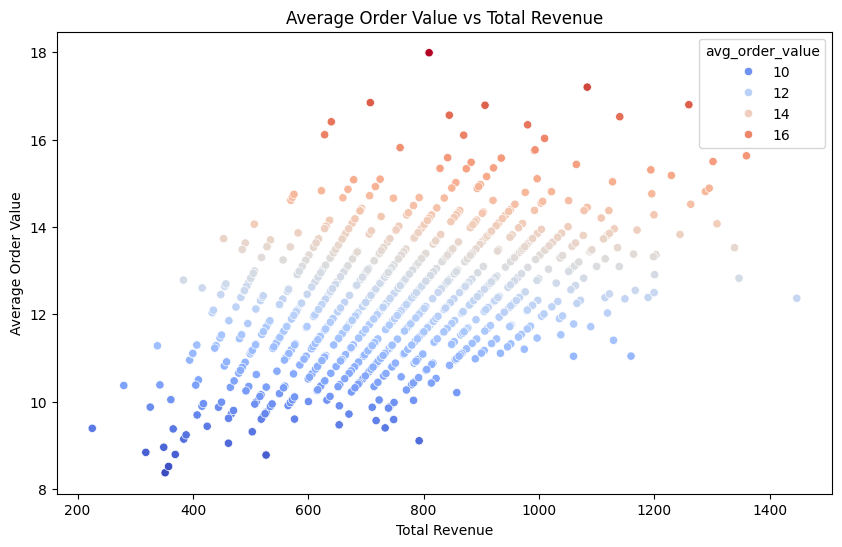

In [184]:
# Calculate average order value for each customer
avg_order_value = df.groupby('customer_number')['revenue'].mean().reset_index()
avg_order_value.columns = ['customer_number', 'avg_order_value']

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(avg_order_value['avg_order_value'], kde=True, color='lightblue')
plt.title('Distribution of Average Order Value by Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot (Average Order Value vs Total Revenue)
merged_data = pd.merge(total_revenue, avg_order_value, on='customer_number')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='avg_order_value', data=merged_data, hue='avg_order_value', palette='coolwarm')
plt.title('Average Order Value vs Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Average Order Value')
plt.show()

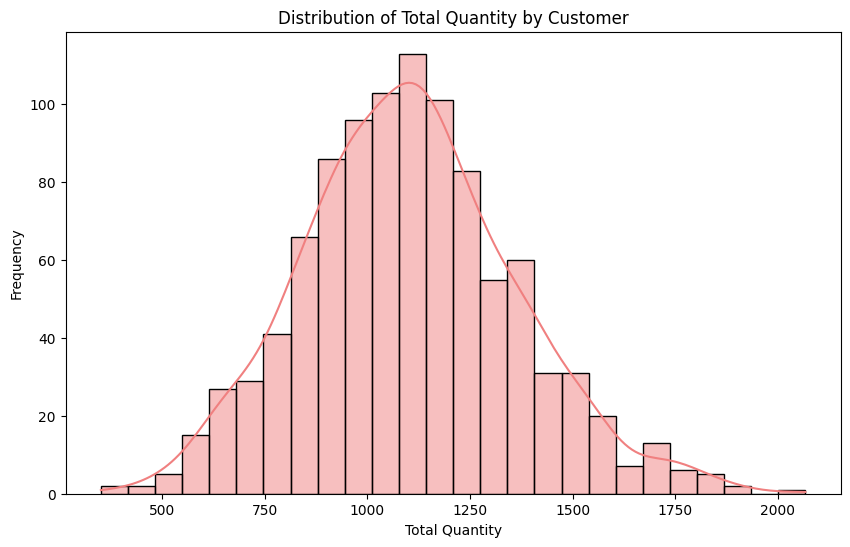

In [185]:
# Calculate total quantity for each customer
total_quantity = df.groupby('customer_number')['quantity'].sum().reset_index()
total_quantity.columns = ['customer_number', 'total_quantity']

# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(total_quantity['total_quantity'], kde=True, color='lightcoral')
plt.title('Distribution of Total Quantity by Customer')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.show()


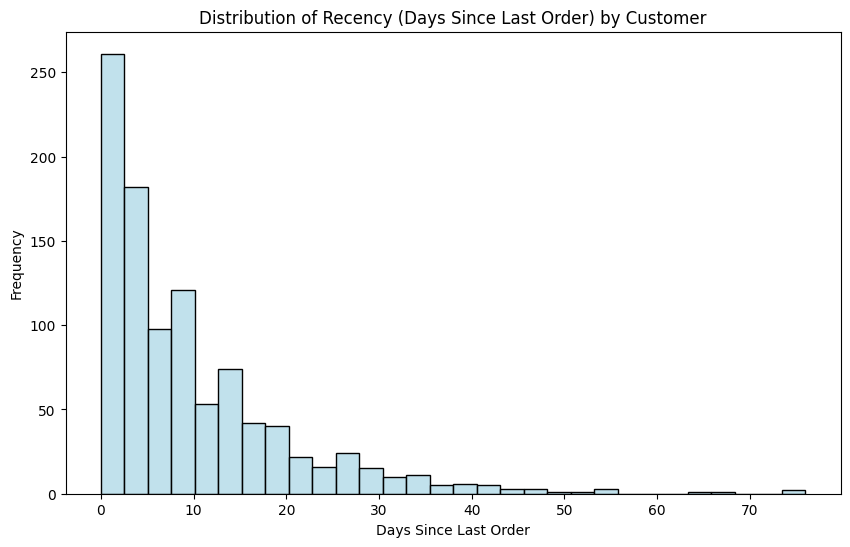

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/2172999652.py:19: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(recency.pivot_table(index='revenue_segment', columns='recency', aggfunc='size', fill_value=0), cmap='Blues')


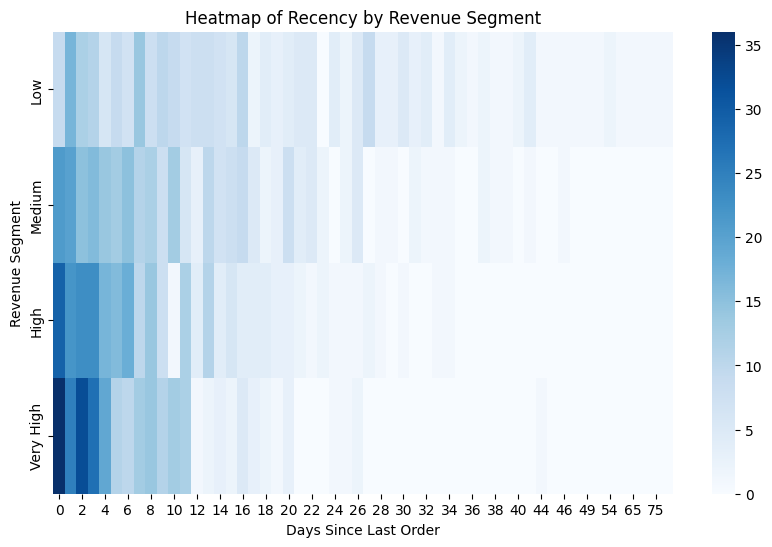

In [186]:
# Calculate recency for each customer
recency = df.groupby('customer_number')['order_date'].max().reset_index()
recency['recency'] = (df['order_date'].max() - recency['order_date']).dt.days
recency = recency.drop('order_date', axis=1)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(recency['recency'], bins=30, color='lightblue')
plt.title('Distribution of Recency (Days Since Last Order) by Customer')
plt.xlabel('Days Since Last Order')
plt.ylabel('Frequency')
plt.show()

# Heatmap of Recency by Revenue Segment
recency = pd.merge(recency, total_revenue, on='customer_number')
recency['revenue_segment'] = pd.qcut(recency['total_revenue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
sns.heatmap(recency.pivot_table(index='revenue_segment', columns='recency', aggfunc='size', fill_value=0), cmap='Blues')
plt.title('Heatmap of Recency by Revenue Segment')
plt.xlabel('Days Since Last Order')
plt.ylabel('Revenue Segment')
plt.show()


In [187]:
# Merge all features into a single DataFrame
customer_data = total_revenue.merge(avg_order_value, on='customer_number')
customer_data = customer_data.merge(total_quantity, on='customer_number')
customer_data = customer_data.merge(recency, on='customer_number')
customer_data['total_revenue'] = customer_data['total_revenue_x']
customer_data = customer_data.drop(['total_revenue_x', 'total_revenue_y'], axis=1)

# Display the aggregated data
print(customer_data.shape)
print(customer_data.head())


(1000, 6)
  customer_number  avg_order_value  total_quantity  recency revenue_segment  \
0         CKE0001        14.970989            1239        1       Very High   
1         CKE0002        14.078982            1310        1       Very High   
2         CKE0003        12.771088            1329        9       Very High   
3         CKE0004        13.817531            1546        5       Very High   
4         CKE0005        12.593713            1049       17            High   

   total_revenue  
0     898.259321  
1     971.449778  
2     919.518332  
3    1119.219980  
4     755.622781  


In [188]:
%pip install setuptools


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [189]:

# Select features for clustering
features = customer_data[['total_revenue', 'avg_order_value', 'total_quantity', 'recency']]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

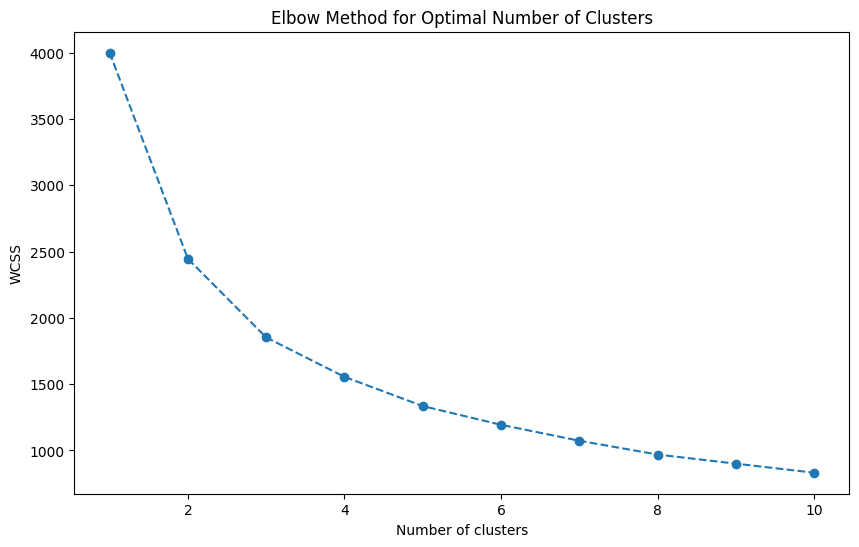

In [190]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

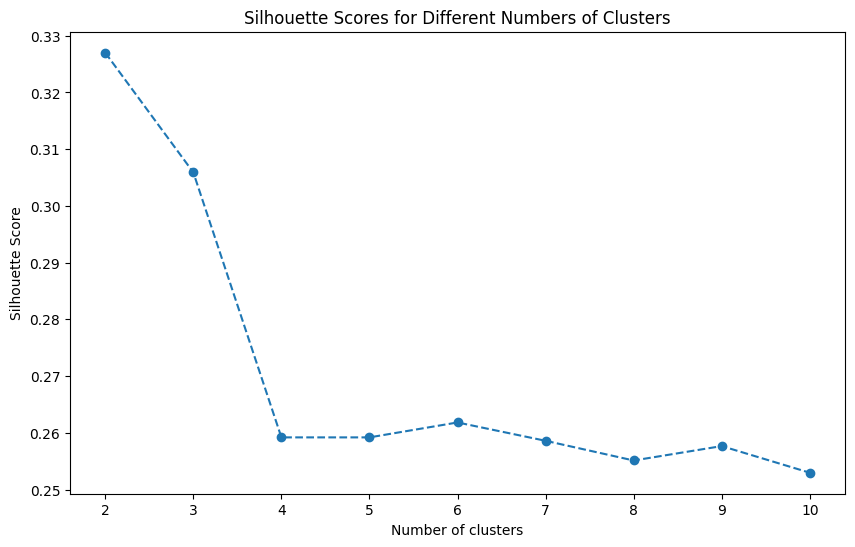

In [191]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    silhouette_avg = silhouette_score(normalized_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [192]:
from sklearn.cluster import KMeans

# Applying K-means with 3 clusters
optimal_clusters = 3
kmeans_3 = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_data['cluster_3'] = kmeans_3.fit_predict(normalized_features)

In [193]:
# install ace_tools 
%pip install ace_tools


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [194]:
# Analyze the characteristics of each cluster (3 clusters)
cluster_summary_3 = customer_data.groupby('cluster_3').agg({
    'total_revenue': ['mean', 'sum'],
    'avg_order_value': 'mean',
    'total_quantity': 'mean',
    'recency': 'mean',
    'customer_number': 'count'
}).reset_index()

# Flatten the MultiIndex columns
cluster_summary_3.columns = ['cluster', 'avg_total_revenue', 'sum_total_revenue', 'avg_order_value', 'avg_total_quantity', 'avg_recency', 'customer_count']

# Display the cluster summary
print(cluster_summary_3)

   cluster  avg_total_revenue  sum_total_revenue  avg_order_value  \
0        0         963.894648      320976.917771        13.249236   
1        1         696.060217      355686.770738        12.234065   
2        2         557.540458       86976.311491        10.764238   

   avg_total_quantity  avg_recency  customer_count  
0         1379.237237     5.498498             333  
1         1007.602740     7.287671             511  
2          824.179487    27.237179             156  


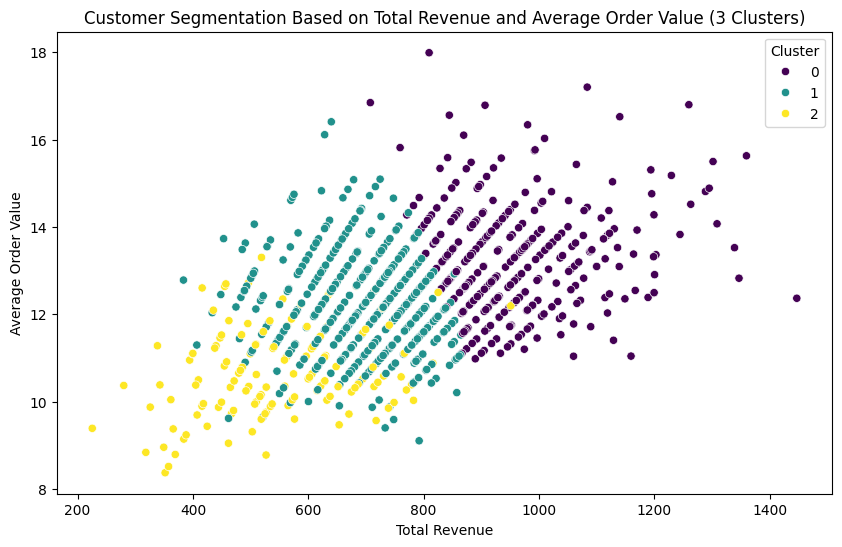

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters (Total Revenue vs. Average Order Value) for 3 clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_revenue', y='avg_order_value', hue='cluster_3', data=customer_data, palette='viridis')
plt.title('Customer Segmentation Based on Total Revenue and Average Order Value (3 Clusters)')
plt.xlabel('Total Revenue')
plt.ylabel('Average Order Value')
plt.legend(title='Cluster')
plt.show()

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/4147590466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='avg_total_revenue', data=cluster_summary_3, palette='viridis')


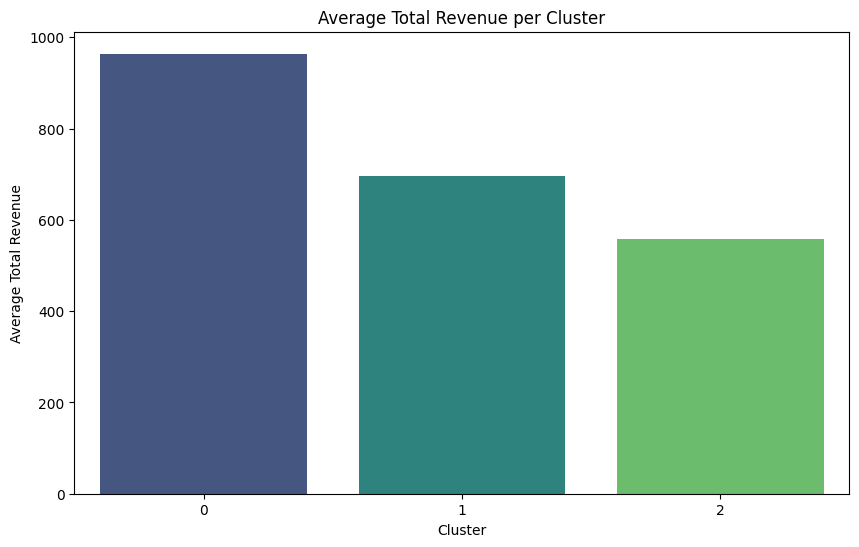

In [196]:
# Bar plot for average total revenue per cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster', y='avg_total_revenue', data=cluster_summary_3, palette='viridis')
plt.title('Average Total Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Revenue')
plt.show()

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/3547843482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster_3', y='recency', data=customer_data, palette='viridis')


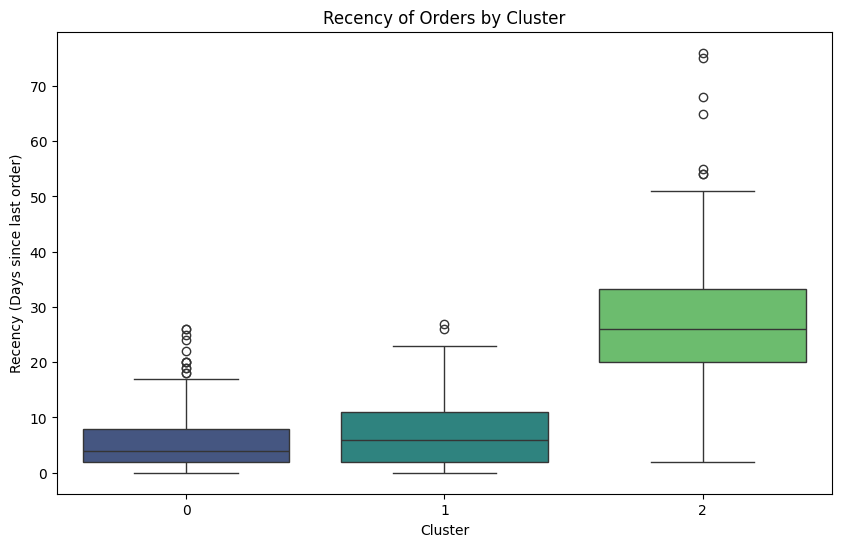

In [197]:
# Box plot for recency by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_3', y='recency', data=customer_data, palette='viridis')
plt.title('Recency of Orders by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency (Days since last order)')
plt.show()

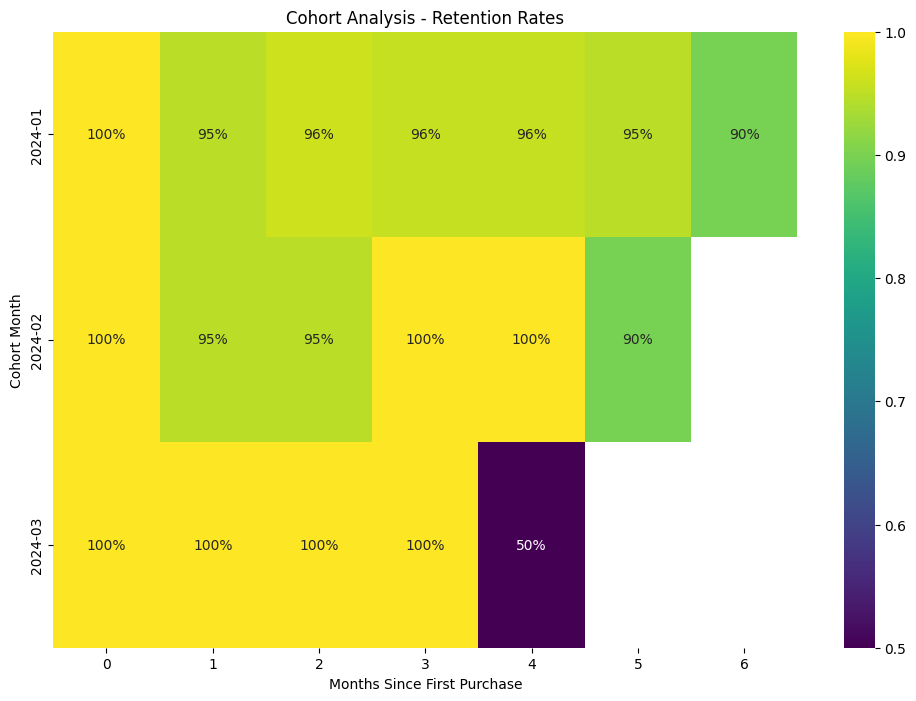

In [198]:
from operator import attrgetter
# Cohort Analysis
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
df['cohort'] = df.groupby('customer_number')['order_date'].transform('min').dt.to_period('M')

cohort_data = df.groupby(['cohort', 'order_month']).agg({
    'customer_number': 'nunique',
    'order_number': 'count',
    'revenue': 'sum'
}).reset_index()

cohort_data['cohort_index'] = (cohort_data['order_month'] - cohort_data['cohort']).apply(attrgetter('n'))

# Pivot table to visualize cohort retention
cohort_pivot = cohort_data.pivot_table(index='cohort', columns='cohort_index', values='customer_number')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='viridis')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/2471959135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='preferred_category', palette='viridis')


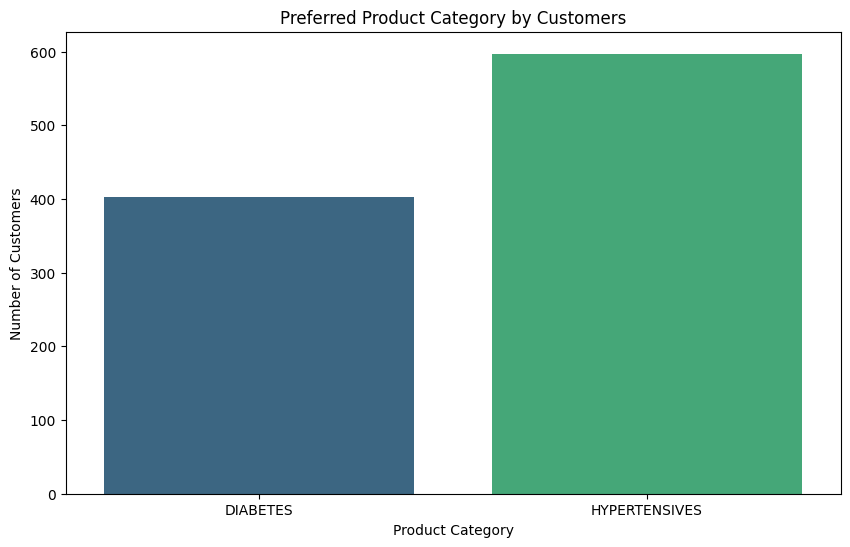

In [199]:

# Segment by product category
category_segment = df.groupby('customer_number')['category'].apply(lambda x: x.mode()[0]).reset_index()
category_segment.columns = ['customer_number', 'preferred_category']

# Merge with customer_data
customer_data = customer_data.merge(category_segment, on='customer_number')

# Visualize preferred categories
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='preferred_category', palette='viridis')
plt.title('Preferred Product Category by Customers')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.show()

/var/folders/50/f6q1hrk501dfrxpnv2scj4pc0000gn/T/ipykernel_30277/2117725104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customer_data, x='churn', palette='viridis')


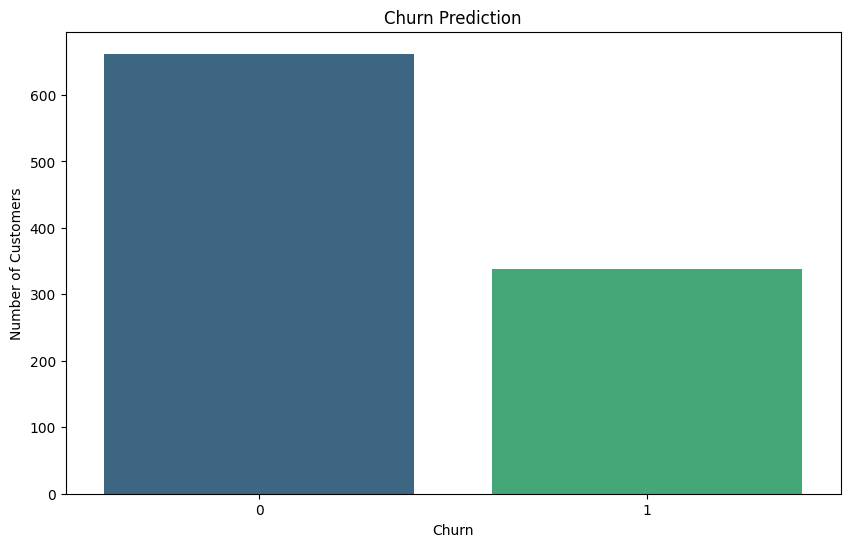

In [205]:
# customers who haven't made a purchase in the last 10 days
customer_data['churn'] = customer_data['recency'].apply(lambda x: 1 if x > 10 else 0)

# Visualize churn
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='churn', palette='viridis')
plt.title('Churn Prediction')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

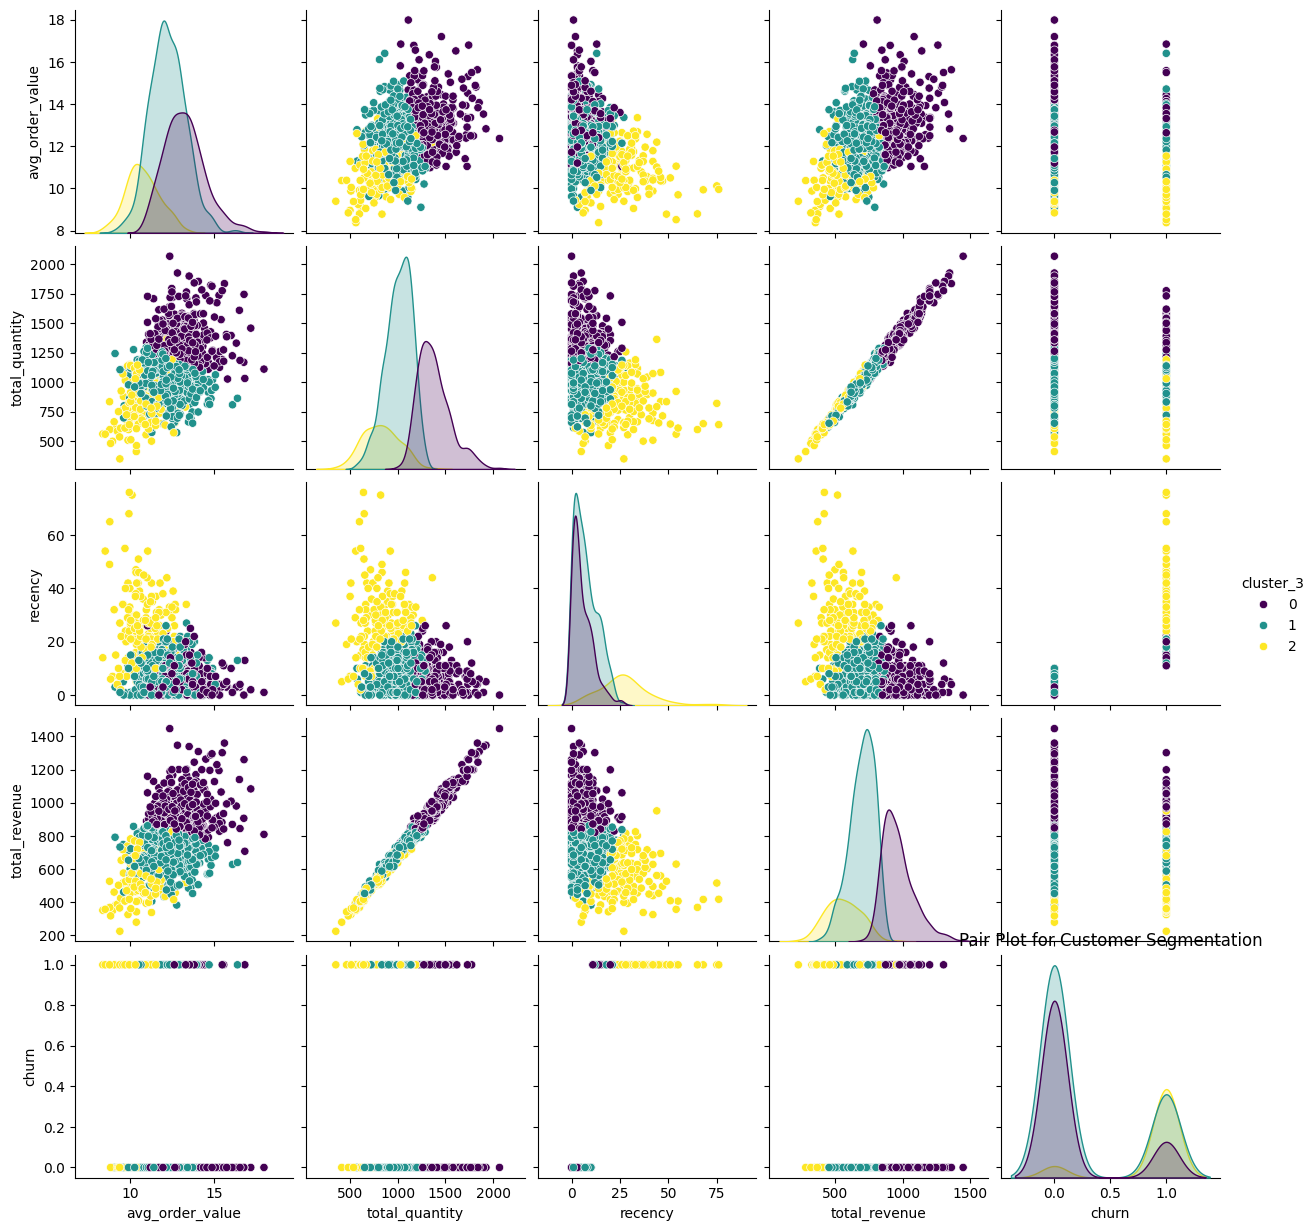

In [206]:
sns.pairplot(customer_data, hue='cluster_3', palette='viridis')
plt.title('Pair Plot for Customer Segmentation')
plt.show()